In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Maximum finding using root finding

In [53]:
def one_A(x):
    return np.exp(-1*(x-2)**2)

In [54]:
def one_A_derivative(x):
    return 2*(x-2)*one_A(x)

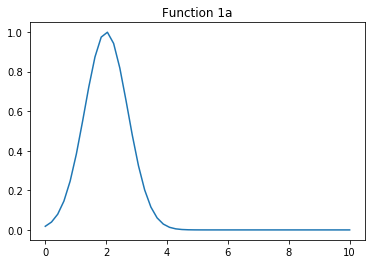

In [55]:
x = np.linspace(0, 10)
plt.plot(x, one_A(x))
plt.title("Function 1a")
plt.show();

In [56]:
def bisection_method(func, lower, upper, acc, MAX=100):
    
    ylower, yupper = func(lower), func(upper)

    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")

    for i in range(MAX):
        # split bracket in half
        mid = (upper+lower)/2
#         print (i, mid)
        ymid = func(mid)
        # check if in lower or upper bracket
        if ylower * ymid <= 0:
            # lower bracket
            upper = mid
        else: 
            # its in upper bracket
            lower = mid
            
        if abs(upper-lower) < acc:
            break
            
    return lower,upper, i+1 

In [57]:
def secant_method(func, lower, upper, acc, MAX=100):
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
        
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values
        x1 = x2
        x2 = x3
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1
        
        

In [58]:
def false_position(func, lower, upper, acc, MAX=100):
    """
    Same as secant, but recent points are the ones that
    bracket the root
    """
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
    
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values, most recent guess is two values that bracket
        if func(x3)*func(x2) <= 0: 
            # if new point has different sign, then update last point
            x1 = x2
        else:
            x1 = x1
        x2 = x3
        
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1

In [59]:
print ("Bisection method to find maximum:")
result = bisection_method(one_A_derivative, 0, 5, acc=1e-8)
print (np.mean(result[:2]))
print (f'{result[-1]} iterations')

print ('\n')

print ("Secant method to find maximum:")
result = secant_method(one_A_derivative, 0, 5, acc=1e-8)
print (np.mean(result[:2]))
print (f'{result[-1]} iterations')

print ('\n')

print ("False position method to find maximum:")
result = false_position(one_A_derivative, 0, 5, acc=1e-8)
print (np.mean(result[:2]))
print (f'{result[-1]} iterations')


Bisection method to find maximum:
1.9999999972060323
29 iterations


Secant method to find maximum:
10.88829375040013
100 iterations


False position method to find maximum:
2.0000000005421503
14 iterations


# Minimizing function in 1D

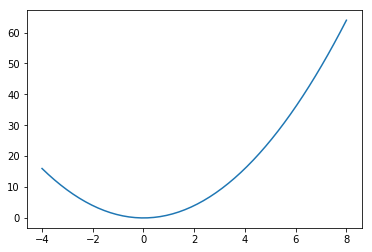

In [60]:
def func2a(x):
    return x**2

x = np.linspace(-4,8)
plt.plot(x,func2a(x))
plt.show();

In [61]:
def simple_bracketing(func, a, b, maxIter=1000,plot_steps=False):
    """
    The simplest method to bracket a minimum
    There is a function minimum between a and c if:
        i) The function is continuous 
        ii) For some a<b<c: 
                f(b) is smaller than both f(a) and f(c)
    """
    # Ensure that f(b) < f(a)
    if func(b) > func(a):
        a, b = b, a
    w = 1.618 # golden ratio
    c = b+(b-a)*w

    if plot_steps:
        plt.plot(x,func2a(x),c='k')
        plt.axvline(a,ls='dashed',label=f'f(a) = {func(a)}',c='C0')
        plt.axvline(b,ls='dashed',label=f'f(b) = {func(b)}',c='C1')
        plt.axvline(c,ls='dashed',label=f'f(c) = {func(c)}',c='C2')
        plt.legend()
        plt.show();

    it = 1
    while (func(c) < func(b)):
        it += 1
        # while not bracketed
        # replace a and b
        a = b
        b = c
        # Propose new point c
        c = b+(b-a)*w
        
        if plot_steps:
            plt.plot(x,func2a(x),c='k')
            plt.axvline(a,ls='dashed',label=f'f(a) = {func(a)}',c='C0')
            plt.axvline(b,ls='dashed',label=f'f(b) = {func(b)}',c='C1')
            plt.axvline(c,ls='dashed',label=f'f(c) = {func(c)}',c='C2')
            plt.legend()
            plt.show();
        
        if it > maxIter:
            # Hard break statement to avoid inf loop
            break
        
    # func(c) > func(b) so
    # Minimum is bracketed, somewhere between a and c
    return a,b,c, it
    
        

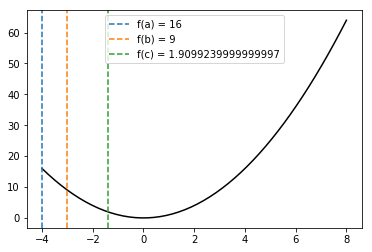

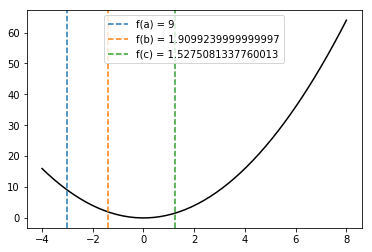

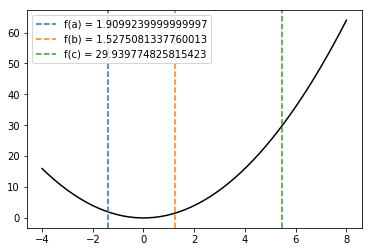

a,b,c that bracket the function 
-1.382 1.2359240000000005 5.471725032000002
Took 3 iterations


In [62]:


a, b = -4, -3
a, b, c, it = simple_bracketing(func2a, a, b,plot_steps=True)
print ("a,b,c that bracket the function ")
print (a,b,c)
print (f"Took {it} iterations")

In [63]:
def parabola_minimum(x1, x2, x3, f1, f2, f3):
    """
    return the point that minimizes the parabola that is fit through
    the three points x1, x2 and x3
    """
    L = (x2 - x1)*(f2-f3)
    M = (x2 - x3)*(f2-f1)
    
    # new point 
    xnew = x2 - ( ( (x2-x3)*M - (x2-x1)*L ) 
                / (2 * (M-L) ) )
    
    return xnew

# Simple bracketing with a parabola
def parabola_bracketing(func, a, b, maxIter=1000,plot_steps=False):
    """
    The simplest method to bracket a minimum + fitting parabola
    assumes two points are given that slope downwards towards a min
    """
    # Ensure that f(b) < f(a)
    if func(b) > func(a):
        a, b = b, a
    w = 1.618 # golden ratio
    c = b+(b-a)*w

    if plot_steps:
        plt.plot(x,func2a(x),c='k')
        plt.axvline(a,ls='dashed',label=f'f(a) = {func(a)}',c='C0')
        plt.axvline(b,ls='dashed',label=f'f(b) = {func(b)}',c='C1')
        plt.axvline(c,ls='dashed',label=f'f(c) = {func(c)}',c='C2')
        plt.legend()
        plt.show();

    it = 1
    while (func(c) < func(b)):
        it += 1
        # while not bracketed
        # Propose point d by fitting a parabola through a,b,c
        d = parabola_minimum(a,b,c,func(a),func(b),func(c))
        
        if plot_steps:
            plt.plot(x,func2a(x),c='k')
            plt.axvline(a,ls='dashed',label=f'f(a) = {func(a)}',c='C0')
            plt.axvline(b,ls='dashed',label=f'f(b) = {func(b)}',c='C1')
            plt.axvline(c,ls='dashed',label=f'f(c) = {func(c)}',c='C2')
            plt.axvline(d,ls='dashed',label=f'f(d) = {func(d)}',c='C3')
            plt.legend()
            plt.show();
        
        if (d > b) and (d<c):
            # if d is in between between b and c, then we're done.
            # Bracketed the minimum between b,d,c
            a,b = b,d
            break
        else:
            if abs(d-b) > 100*(c-b):
                # Don't trust, just use 
                c = b+(b-a)*w
            else:
                # Trust, move all points over
                a,b,c = b,c,d
        
        if it > maxIter:
            # Hard break statement to avoid inf loop
            break
        
    # func(c) > func(b) so
    # Minimum is bracketed, somewhere between a and c
    return a,b,c, it
    
        

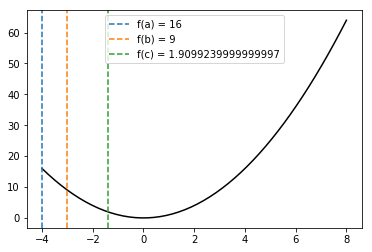

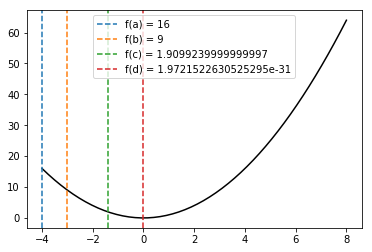

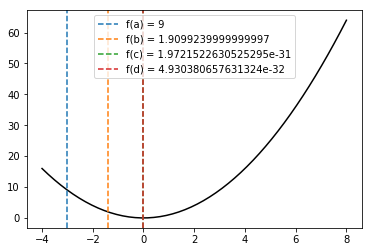

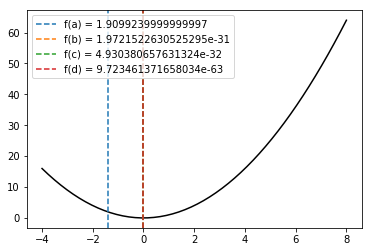

a,b,c that bracket the function 
-4.440892098500626e-16 9.860761315262648e-32 2.220446049250313e-16
Took 4 iterations


In [64]:


a, b = -4, -3
a, b, c, it = parabola_bracketing(func2a, a, b,plot_steps=True)
print ("a,b,c that bracket the function ")
print (a,b,c)
print (f"Took {it} iterations")

In [65]:
a, b = -4, 8
a, b, c, it = parabola_bracketing(func2a, a, b,plot_steps=False)
print ("a,b,c that bracket the function ")
print (a,b,c)
print (f"Took {it} iterations")

print ("\n Is dit de bedoeling??")

a,b,c that bracket the function 
8 -4 -23.416
Took 1 iterations

 Is dit de bedoeling??


### Now tighten the bracket with Golden Section Search

In [177]:
def golden_section(func,a,b,c,tolerance=2e-8,maxIter=500,plot_steps=False):
    """
    Given points a,b,c that bracket a minimum for the function func
    Do Golden Section Search to tighten the bracket.
    
    Maximum achievable tolerance is usually about 
    1e-8 * |central value|
    for double precision
    
    For bookkeeping purposes, we label the points 
    x0<x1<x2<x3 
    where x0 and x3 are the initial a and c, and x1 and x2 are 
    b and new point d, swapped depending on which interval is largest
    """
    w = 0.38
    x0 = a
    x3 = c
    x1, x2 = b, b # for the initial step
    
    if plot_steps:
        plt.plot(x,func(x),c='k')
        plt.axvline(a,ls='dashed',label=f'f(a) = {func(a)}',c='C0')
        plt.axvline(b,ls='dashed',label=f'f(b) = {func(b)}',c='C1')
        plt.axvline(c,ls='dashed',label=f'f(c) = {func(c)}',c='C2')
        plt.legend()
        plt.show();

    it = 1
    while (abs(x0-x3) > tolerance*(abs(x1)+abs(x2))):
        it += 1
        
        x0 = a
        x3 = c
        
        # Go 'w' into the largest interval of a,b,c
        if abs(b-a) < abs(c-b): # (b,c) is larger than (a,b)
            d = b+(c-b)*w # "Midpoint" d

            x1 = b # Then b is the second point x1
            x2 = d # d is the third point x2

        else: # (a,b) is larger than (b,c)
            d = b-(b-a)*w 

            x1 = d
            x2 = b

        # Then, check whether the proposed point replaces a or c
        if func(x1) < func(x2):
            a,b,c = x0,x1,x2 # replace c
        else:
            a,b,c = x1,x2,x3 # replace a
            
        if plot_steps:
            plt.plot(x,func(x),c='k')
            plt.axvline(a,ls='dashed',label=f'f(a) = {func(a)}',c='C0')
            plt.axvline(b,ls='dashed',label=f'f(b) = {func(b)}',c='C1')
            plt.axvline(c,ls='dashed',label=f'f(c) = {func(c)}',c='C2')
            plt.axvline(d,ls='dashed',label=f'f(d) = {func(d)}',c='C3')
            plt.legend()
            plt.show();
            
        if it > maxIter:
            break
            
        if abs(x1) < tolerance**2:
            print ("\n===The function probably has a minimum at 0===")
            # If the function has its minimum at 0 then it does not 
            # break the tolerance. This fixes that.
            return a,b,c, it
        
    return a,b,c, it
    

In [178]:
# First bracket the minimum
a, b = -4, 8
a, b, c, it = parabola_bracketing(func2a, a, b, plot_steps=False)
print ("Initial bracket")
print (a,b,c)

a, b, c, it = golden_section(func2a, a, b, c,maxIter=100)
print (f"Tightened bracket after {it} iterations")
print (a,b,c)

print (f"\nBest guess minimum is {b}: {func2a(b)}")


Initial bracket
8 -4 -23.416

===The function probably has a minimum at 0===
Tightened bracket after 80 iterations
4.764029345214473e-16 -3.73338269110085e-17 -3.558506189991311e-16

Best guess minimum is -3.73338269110085e-17: 1.3938146318211426e-33


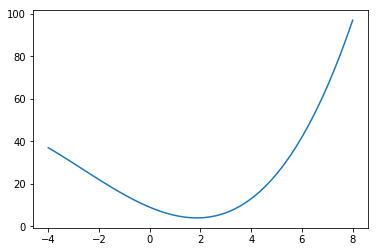

In [165]:
def func2a_test(x):
    return (x-3)**2+x+(x/2)**3

x = np.linspace(-4,8)
plt.plot(x,func2a_test(x))
plt.show();

Initial bracket after 4 iterations
-1.382 1.2359240000000005 3.9895743147193894


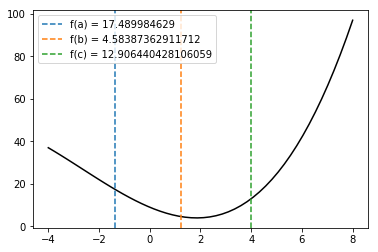

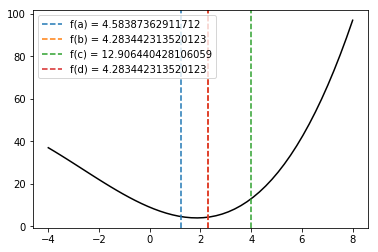

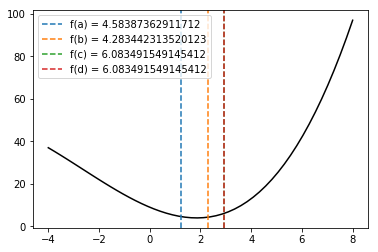

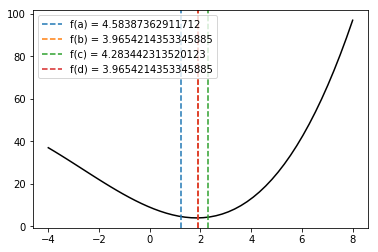

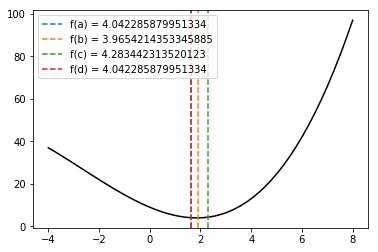

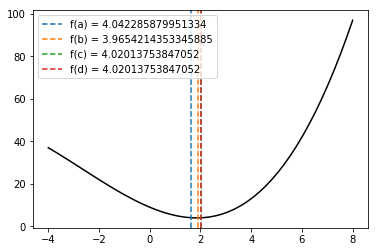

Tightened bracket after 6 iterations
1.638155208771691 1.8846840141478884 2.0357823142171707
Best guess minimum is 1.8846840141478884: 3.9654214353345885


In [179]:
############## TEST to see if it also works not around 0
#### for a not parabolic function

# First bracket the minimum
a, b = -4, -3
a, b, c, it = parabola_bracketing(func2a_test, a, b, plot_steps=False)
print (f"Initial bracket after {it} iterations")
print (a,b,c)

a, b, c, it = golden_section(func2a_test, a, b, c,2e-8,5
                             ,plot_steps=True)
print (f"Tightened bracket after {it} iterations")
print (a,b,c)
print (f"Best guess minimum is {b}: {func2a_test(b)}")